# Delete before final submission - for sample data only

In [1]:
import pandas as pd

folder_path = '../Final Data/final_data.csv'

real_df = pd.read_csv(folder_path)


# Delete before submission, for sample data set only

In [2]:
df = real_df.head(100)

df.to_csv('../Final Data/subset_final_data.csv', index=False)

In [8]:
# from plotnine import ggplot, aes, geom_point, labs

In [3]:
# Print unique values in the 'Airline Company' column
# Remove unwanted parts from the 'Airline Company' column
df['Airline Company'] = df['Airline Company'].str.replace("'name': '", '').str.replace("'", '')

# Print unique values in the cleaned 'Airline Company' column
print(df['Airline Company'].unique())


['delta air lines' 'alitalia' 'klm' 'latam airlines' 'virgin atlantic'
 'westjet' 'aeromexico' 'air france' 'korean air' 'spirit airlines'
 'southwest airlines' 'alaska airlines' 'gulf air' 'qantas'
 'qatar airways' 'american airlines' 'pakistan international airlines'
 'singapore airlines' 'turkish airlines']


/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_13266/565250097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Airline Company'] = df['Airline Company'].str.replace("'name': '", '').str.replace("'", '')


Index(['departure airport IATA', 'arrival airport IATA', 'delay in mins',
       'estimatedDelay', 'Airline Company', 'month_day'],
      dtype='object')


<Figure size 1200x800 with 0 Axes>

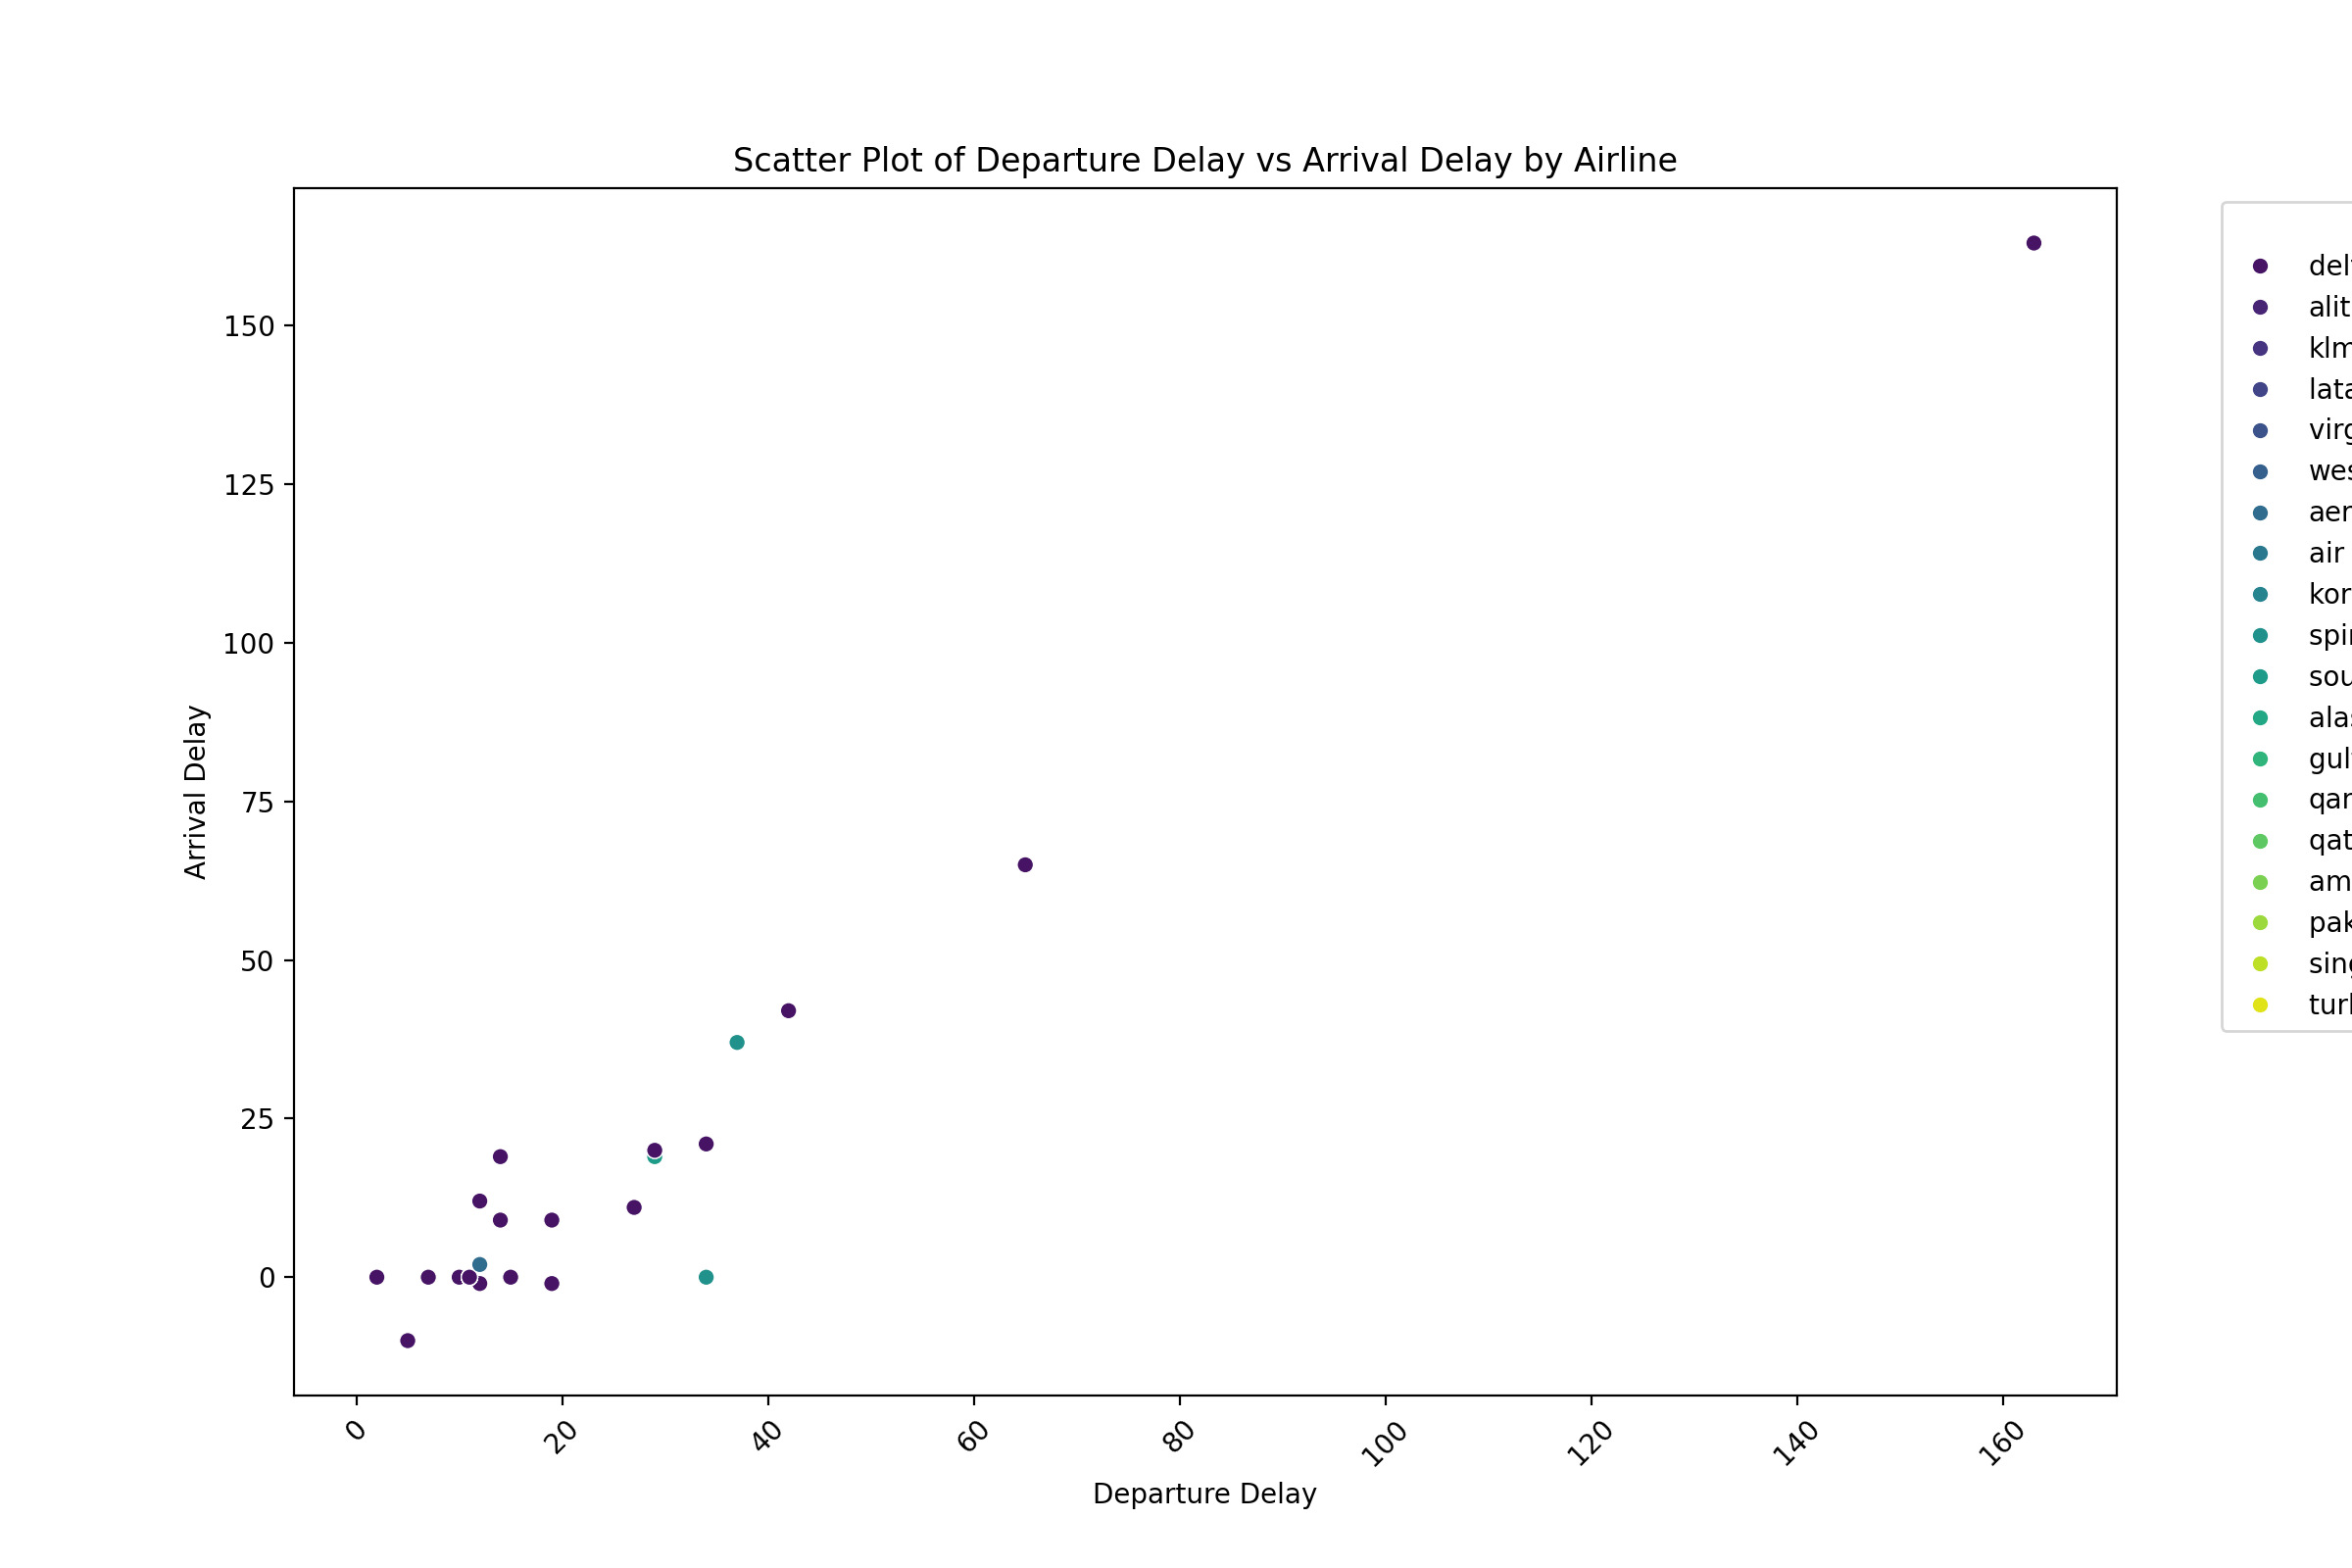

In [51]:
# good, colorful and good dots, don't touch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# Print the column names to identify the correct ones
print(df.columns)

# Adjust the column names based on your actual dataset
x_column = 'delay in mins'  # Replace with the correct column name
y_column = 'estimatedDelay'  # Replace with the correct column name

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_column, y=y_column, hue='Airline Company', data=df, palette='viridis')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set plot labels and title
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title('Scatter Plot of Departure Delay vs Arrival Delay by Airline')

# Show legend
plt.legend(title='Airline Company', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_13266/2968323543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delay in mins'] = pd.to_numeric(df['delay in mins'].str.replace("'delay':", ''), errors='coerce')


In [13]:
# only need to run once 
# df['delay in mins'] = pd.to_numeric(df['delay in mins'].str.replace("'delay':", ''), errors='coerce')
df['delay in mins'] = pd.to_numeric(df['delay in mins'].str.replace("'delay':", ''), errors='coerce')

df['departure airport IATA'] = df['departure airport IATA'].str.replace("'iataCode': '", '').astype(str)

df['arrival airport IATA'] = df['arrival airport IATA'].str.replace("'iataCode': '", '').astype(str)

df['estimatedDelay'] = pd.to_numeric(df['estimatedDelay'].str.replace("'delay':", ''), errors='coerce')


/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_13266/1564067533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure airport IATA'] = df['departure airport IATA'].str.replace("'iataCode': '", '').astype(str)
/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_13266/1564067533.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival airport IATA'] = df['arrival airport IATA'].str.replace("'iataCode': '", '').astype(str)


In [17]:
# Print the column names to identify the correct ones
print(df)


   departure airport IATA arrival airport IATA  delay in mins  estimatedDelay  \
0                     atl                  rsw           12.0            12.0   
1                     atl                  sat           12.0            -1.0   
2                     atl                  sat           12.0            -1.0   
3                     atl                  sat           12.0            -1.0   
4                     atl                  sat           12.0            -1.0   
..                    ...                  ...            ...             ...   
95                    atl                  pns           65.0            65.0   
96                    atl                  pns           65.0            65.0   
97                    atl                  pns           65.0            65.0   
98                    atl                  iad           12.0             2.0   
99                    atl                  iad           12.0             2.0   

    Airline Company month_d

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 292 rows containing missing values.


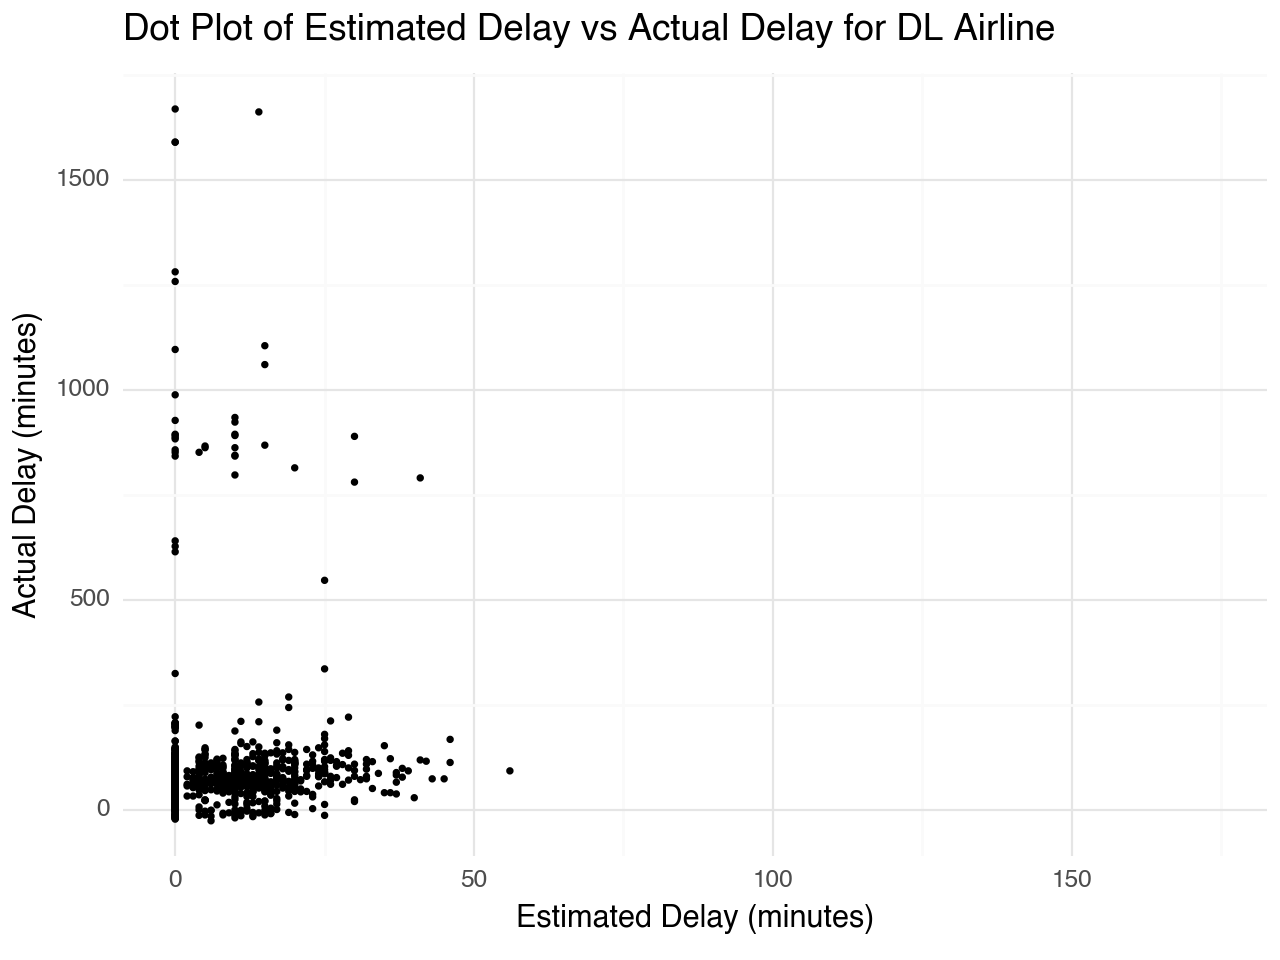

In [ ]:
# (old code) good, updated with input airline
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme_minimal

def create_delay_plot(data, airline_name):
    # Function to extract scheduled time from departure details
    def extract_scheduled_time(row):
        departure_details = eval(row['departure'])
        return pd.to_datetime(departure_details.get('scheduledTime', pd.NaT))

    # Function to extract estimated time from departure details
    def extract_estimated_time(row):
        departure_details = eval(row['departure'])
        return pd.to_datetime(departure_details.get('estimatedTime', pd.NaT))

    # Extract relevant information using the defined functions
    data['scheduledTime'] = data.apply(extract_scheduled_time, axis=1)
    data['estimatedTime'] = data.apply(extract_estimated_time, axis=1)
    data['estimatedDelay'] = (data['estimatedTime'] - data['scheduledTime']).dt.total_seconds() / 60.0
    data['actualDelay'] = (pd.to_datetime(data['arrival'].apply(lambda x: eval(x).get('estimatedTime', pd.NaT))) - data['scheduledTime']).dt.total_seconds() / 60.0
    data['airline'] = data['airline'].apply(lambda x: eval(x)['iataCode'])

    # Filter flights for the specified airline
    data_selected_airline = data[data['airline'] == airline_name]

    # Filter out negative values for the x-axis
    data_selected_airline = data_selected_airline[data_selected_airline['estimatedDelay'] >= 0]

    # Plotting using plotnine
    p = ggplot(data_selected_airline, aes(x='estimatedDelay', y='actualDelay')) + \
        geom_point(size=0.5) + \
        labs(title=f'Dot Plot of Estimated Delay vs Actual Delay for {airline_name.upper()} Airline',
             x='Estimated Delay (minutes)',
             y='Actual Delay (minutes)') + \
        theme_minimal()

    # Show the plot
    print(p)

# Load your CSV data into a pandas DataFrame
df = pd.read_csv("ATL.csv")

# User input for the airline name
user_airline = input("Enter the airline name: ").strip().lower()

# Use the function with your DataFrame and specified airline name
create_delay_plot(df, user_airline)


In [21]:
# (old code) worked, but text box is ugly
import pandas as pd
import plotly.express as px

# Load your CSV data into a pandas DataFrame
df = pd.read_csv("final_data.csv")

# Function to extract scheduled time from departure details
def extract_scheduled_time(row):
    departure_details = eval(row['departure'])
    return pd.to_datetime(departure_details.get('scheduledTime', pd.NaT))

# Function to extract estimated time from departure details
def extract_estimated_time(row):
    departure_details = eval(row['departure'])
    return pd.to_datetime(departure_details.get('estimatedTime', pd.NaT))

# Extract relevant information using the defined functions
df['scheduledTime'] = df.apply(extract_scheduled_time, axis=1)
df['estimatedTime'] = df.apply(extract_estimated_time, axis=1)
df['estimatedDelay'] = (df['estimatedTime'] - df['scheduledTime']).dt.total_seconds() / 60.0
df['actualDelay'] = (pd.to_datetime(df['arrival'].apply(lambda x: eval(x).get('estimatedTime', pd.NaT))) - df['scheduledTime']).dt.total_seconds() / 60.0
df['airline'] = df['airline'].apply(lambda x: eval(x)['iataCode'])
df['arrivalAirport'] = df['arrival'].apply(lambda x: eval(x)['icaoCode'])
df['destination'] = df['arrival'].apply(lambda x: eval(x).get('iataCode', pd.NaT))

# User input for the airline name
user_airline = input("Enter the airline name: ").strip().lower()

# User input for the arrival airport
user_arrival_airport = input("Enter the arrival airport (ICAO code): ").strip().lower()

# User input for the travel destination
user_destination = input("Enter the travel destination (IATA code): ").strip().lower()

# Filter flights for the specified airline, arrival airport, and destination
df_selected_flights = df[(df['airline'].str.lower() == user_airline) & (df['arrivalAirport'].str.lower() == user_arrival_airport) & (df['destination'].str.lower() == user_destination)]

# Filter out negative values for the x-axis
df_selected_flights = df_selected_flights[df_selected_flights['estimatedDelay'] >= 0]

# Create an interactive scatter plot with the date of travel on the x-axis and "actualDelay" on the y-axis
fig_date = px.scatter(df_selected_flights, x='scheduledTime', y='actualDelay', title=f'Dot Plot of Actual Delay vs Date of Travel for {user_airline.upper()} Airline to {user_arrival_airport.upper()}',
                 labels={'actualDelay': 'Actual Delay (minutes)', 'scheduledTime': 'Date of Travel'},
                 hover_name='flight',
                 hover_data={'flight': False, 'actualDelay': True, 'scheduledTime': '|%B %d, %Y %I:%M %p'},
                 trendline='ols',  # Ordinary Least Squares regression line
                 )

# Show the interactive plot for the date of travel
fig_date.show()

# Create another interactive scatter plot with the estimated delay on the x-axis and actual delay on the y-axis
fig_delay = px.scatter(df_selected_flights, x='estimatedDelay', y='actualDelay', title=f'Dot Plot of Estimated Delay vs Actual Delay for {user_airline.upper()} Airline to {user_arrival_airport.upper()}',
                 labels={'estimatedDelay': 'Estimated Delay (minutes)', 'actualDelay': 'Actual Delay (minutes)'},
                 hover_name='flight',
                 hover_data={'flight': False, 'estimatedDelay': True, 'actualDelay': True},
                 trendline='ols',  # Ordinary Least Squares regression line
                 )

# Show the interactive plot for the estimated delay
fig_delay.show()


FileNotFoundError: [Errno 2] No such file or directory: 'final_data.csv'

In [27]:
# need to change label content - a dot with a label, with hover- over, with regression line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# User input for departure airport, airline, and destination airport
departure_airport = input("Enter departure airport (e.g., ATL): ").lower()
airline = input("Enter airline (e.g., Delta Air Lines): ").lower()
destination_airport = input("Enter destination airport (e.g., RSW): ").lower()

# Filter the dataframe based on user input
filtered_df = df[(df['departure airport IATA'] == departure_airport) &
                 (df['Airline Company'] == airline) &
                 (df['arrival airport IATA'] == destination_airport)]

# Check if there are any matching records
if filtered_df.empty:
    print("No matching records found.")
else:
    fig_delay = px.scatter(filtered_df, x='delay in mins', y='estimatedDelay', title=f'place holder title {airline.upper()} Airline to {destination_airport.upper()}',
                 labels={'delay in mins': 'departure delay', 'estimatedDelay': 'arrival delay'},
                 hover_name='arrival airport IATA',
                 hover_data={'arrival airport IATA': False, 'delay in mins': True, 'estimatedDelay': '|%B %d, %Y %I:%M %p'},
                 trendline='ols',  # Ordinary Least Squares regression line
                 )
fig_delay.show()


# Try 1 
but it didn't work, in the next try we are going to do it step by step

In [ ]:
#good, but no world map
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import pandas as pd

# Get user input for the departing airport and the airline
user_departure_airport = input("Enter the departing airport (ICAO code): ").strip().lower()
user_airline = input("Enter the airline (IATA code): ").strip().lower()

# Load your CSV data into a pandas DataFrame (replace 'ATL.csv' with the actual file path)
df = pd.read_csv('ATL.csv')

# Filter the data based on user input
df['departureDetails'] = df['departure'].apply(eval)
df['iataCode'] = df['departureDetails'].apply(lambda x: x.get('iataCode', '').lower())
df['airline_iataCode'] = df['airline'].apply(lambda x: eval(x).get('iataCode', '').lower())
df = df[(df['iataCode'] == user_departure_airport) & (df['airline_iataCode'] == user_airline)]

# Extract relevant information from the nested columns
df['departureDetails'] = df['departure'].apply(eval)
df['delay'] = df['departureDetails'].apply(lambda x: x.get('delay', 0))

# Count the number of delayed flights for each airport
delay_counts = df.groupby(['iataCode', 'airline_iataCode']).size().reset_index(name='DelayQuantity')

# Merge the delay counts with the world map data
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world_data.merge(delay_counts, how='left', left_index=True, right_index=True)

# Plot the world map with a gradient color based on the quantity of delays
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
cmap = cm.get_cmap('viridis')  # You can choose a different colormap
norm = Normalize(vmin=merged_data['DelayQuantity'].min(), vmax=merged_data['DelayQuantity'].max())
merged_data.plot(column='DelayQuantity', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm)

# Customize the plot
ax.set_title(f'World Map with Gradient Color Based on Delay Quantity\n{user_airline.upper()} Airline from {user_departure_airport.upper()}')
ax.set_axis_off()  # Turn off axis

# Add a colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', shrink=0.6, aspect=20)
cbar.set_label('Delay Quantity')

plt.show()



KeyboardInterrupt: Interrupted by user

In [ ]:
print(merged_data)

         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame
# Load your CSV data into a pandas DataFrame (replace 'ATL.csv' with the actual file path)
df = pd.read_csv('ATL.csv')

# Filter the data for flights departing from ATL
df['departureDetails'] = df['departure'].apply(eval)
df['iataCode'] = df['departureDetails'].apply(lambda x: x.get('iataCode', '').lower())
df_atl = df[df['iataCode'] == 'atl']

# Extract relevant information from the nested columns
df_atl['departureDetails'] = df_atl['departure'].apply(eval)
df_atl['delay'] = df_atl['departureDetails'].apply(lambda x: x.get('delay', 0))

# Create a DataFrame with average minutes of delays for each destination airport
average_delay_df = df_atl.groupby('arrival').agg({'delay': 'mean'}).reset_index()

# Print the resulting DataFrame
print(average_delay_df)


                                                arrival  delay
0     {'iataCode': 'abe', 'icaoCode': 'kabe', 'sched...   14.0
1     {'iataCode': 'abe', 'icaoCode': 'kabe', 'sched...   18.0
2     {'iataCode': 'abe', 'icaoCode': 'kabe', 'sched...   14.0
3     {'iataCode': 'abe', 'icaoCode': 'kabe', 'sched...   19.0
4     {'iataCode': 'abe', 'icaoCode': 'kabe', 'sched...    8.0
...                                                 ...    ...
2322  {'iataCode': 'yyz', 'icaoCode': 'cyyz', 'termi...   20.0
2323  {'iataCode': 'yyz', 'icaoCode': 'cyyz', 'termi...   26.0
2324  {'iataCode': 'yyz', 'icaoCode': 'cyyz', 'termi...    5.0
2325  {'iataCode': 'yyz', 'icaoCode': 'cyyz', 'termi...   30.0
2326  {'iataCode': 'yyz', 'icaoCode': 'cyyz', 'termi...   16.0

[2327 rows x 2 columns]


# Try 2 

In [39]:
import pandas as pd

# doesn't make a lot of sense, so don't run
# Load your new dataset (replace 'new_dataset.csv' with your actual file path)
# df = pd.read_csv('final_data (2).csv')

# Convert the "delay in mins" column to numeric (if it's not already)
# df['delay in mins'] = pd.to_numeric(df['delay in mins'], errors='coerce')

# Create a DataFrame with average minutes of delays for each departure airport
average_delay_df = df.groupby('departure airport IATA').agg({'delay in mins': 'mean'}).reset_index()

# Print the resulting DataFrame
print(average_delay_df)


  departure airport IATA  delay in mins
0                    atl      20.302083


In [41]:
# worked - sorted, consolidated, and has input command
import pandas as pd

# Assuming the column names in your dataset are 'departure airport IATA', 'arrival airport IATA', 'delay in mins', 'estimatedDelay', 'Airline Company'

# Convert 'estimatedDelay' to numeric (if it's not already)
df['estimatedDelay'] = pd.to_numeric(df['estimatedDelay'], errors='coerce')

# Get user input for the departure airport IATA code
user_departure_airport = input("Enter the departure airport IATA code: ").strip()

# Filter for flights departing from the specified airport
df_user_departure = df[df['departure airport IATA'].str.contains(user_departure_airport, na=False)]
# Extract the actual airport code from the strings in the 'arrival airport IATA' column
# average_delay_df['arrival airport IATA'] = average_delay_df['arrival airport IATA'].str.extract(r"'iataCode': '(.*?)'")

# Create a DataFrame with average estimatedDelay for each arrival airport
average_delay_df = df_user_departure.groupby('arrival airport IATA').agg({'estimatedDelay': 'mean'}).reset_index()

# Print the resulting DataFrame
print(average_delay_df)


/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_13266/814742380.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   arrival airport IATA  estimatedDelay
0                   ams       42.000000
1                   avl        0.000000
2                   boi       20.000000
3                   bwi       19.000000
4                   cdg       65.000000
5                   cvg        9.000000
6                   dfw             NaN
7                   dtw        0.000000
8                   dub      163.000000
9                   elp        0.000000
10                  fll        0.000000
11                  hpn        0.000000
12                  iad        2.000000
13                  iah        7.714286
14                  ind       11.000000
15                  ist       67.000000
16                  jan      -10.000000
17                  mco       37.000000
18                  pbi       -1.000000
19                  pns       65.000000
20                  rsw       12.000000
21                  sat       -1.000000
22                  sfo        0.000000
23                  sna       21.000000


# probably not necessary
# Create a new DataFrame with the last three letters of 'arrival airport IATA' and 'estimatedDelay'
new_df = pd.DataFrame({
    'arrival_airport_iata': average_delay_df['arrival airport IATA'].str[-3:],
    'estimatedDelay': average_delay_df['estimatedDelay']
})

# Print the resulting DataFrame
print(new_df)


In [43]:
# good final - gives iata, estimated delay, long, lat
# Merge the DataFrames on the common column 'arrival airport IATA' and 'code'
merged_df = average_delay_df.merge(airports_df, left_on='arrival airport IATA', right_on='code', how='left')

# Drop the redundant columns
merged_df = merged_df[['arrival airport IATA', 'estimatedDelay', 'longitude', 'latitude']]

# Print the resulting DataFrame
print(merged_df)

   arrival airport IATA  estimatedDelay            longitude  \
0                   ams       42.000000    4.741505200022974   
1                   avl        0.000000   -82.54088095049624   
2                   boi       20.000000           -116.22193   
3                   bwi       19.000000            -76.66894   
4                   cdg       65.000000   2.5710819691019156   
5                   cvg        9.000000            -84.66145   
6                   dfw             NaN    -97.0465220537124   
7                   dtw        0.000000   -83.35297537621658   
8                   dub      163.000000   -6.247592522077657   
9                   elp        0.000000  -106.36664263248113   
10                  fll        0.000000   -80.15099673135214   
11                  hpn        0.000000   -73.70833333823488   
12                  iad        2.000000    -77.4534849116007   
13                  iah        7.714286   -95.33298595614491   
14                  ind       11.000000 

In [29]:
# not as good, broken, don't run - defines airports_df
# cleaned up the airports csv into a df with code, long, lat
import pandas as pd
folder_path_airports = '../Data/airports.csv'

airports_df = pd.read_csv(folder_path_airports)

# Assuming your dataset is stored in 'airports.csv'
# Extract longitude and latitude from the 'location' column
airports_df[['longitude', 'latitude']] = airports_df['location'].str.extract(r'(-?\d+\.\d+) (-?\d+\.\d+)')

# Keep only the 'code', 'longitude', and 'latitude' columns
airports_df = airports_df[['code', 'longitude', 'latitude']]

# Convert 'code' column to lowercase
airports_df['code'] = airports_df['code'].str.lower()

# Print the resulting DataFrame
print(airports_df)


     code           longitude            latitude
0     ugl          -83.320833          -79.777778
1     sxw           148.95305           -5.971389
2     ndv                 NaN                 NaN
3     eap            7.529167               47.59
4     net  -75.45763803663925  24.314824100000003
...   ...                 ...                 ...
9760  dgh             86.7025           24.444722
9761  qgp          -36.471389           -8.834444
9762  vrz            -44.9639            -21.2406
9763  qig          -39.298611           -6.347778
9764  gox             73.8631             15.7302

[9765 rows x 3 columns]


In [50]:
# not final - worked as filtered iata, estimated delay, logitude, latitude 

# Merge new_df with airports_df based on the 'code' and 'arrival_airport_iata' columns
merged_with_coordinates = new_df.merge(airports_df, left_on='arrival_airport_iata', right_on='code', how='left')

# Drop the redundant columns
result_df = merged_with_coordinates[['arrival_airport_iata', 'estimatedDelay', 'longitude', 'latitude']]

# Print the resulting DataFrame
print(result_df)


    arrival_airport_iata  estimatedDelay            longitude  \
0                    abe        7.552239   -75.44225386838299   
1                    abq        4.303030  -106.61096752176844   
2                    aby       13.963636   -84.19254493414799   
3                    add        0.000000    38.79727968929066   
4                    aex        2.053333   -92.54095486627727   
..                   ...             ...                  ...   
251                  yvr       16.200000  -123.17986424460963   
252                  ywg       11.000000    -97.2379281374448   
253                  yyc       24.800000  -114.01057234296194   
254                  yyt             NaN   -52.74791992027517   
255                  yyz       17.912500            -79.61146   

               latitude  
0    40.651163100000005  
1    35.037669449999996  
2            31.5339678  
3            8.97958075  
4    31.329273649999998  
..                  ...  
251           49.193044  
252        

In [44]:
import matplotlib.pyplot as plt 
import pandas as pd
import geopandas as gpd

/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_13266/4071836450.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



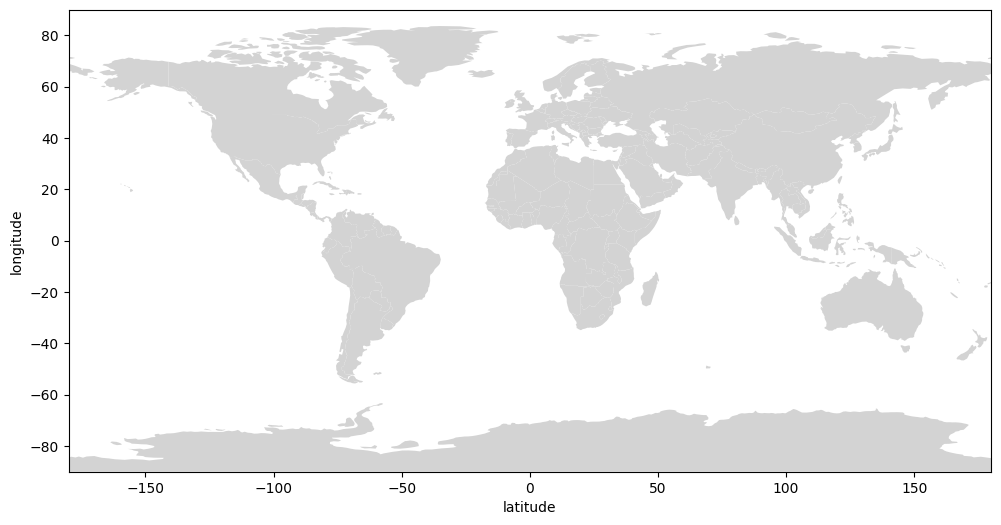

In [48]:
# worked, but no points
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(12, 6)) 
worldmap.plot(color="lightgrey", ax=ax)
x = merged_df['latitude']
y = merged_df['longitude']
# Creating axis limits and title 
plt.xlim([-180, 180]) 
plt.ylim([-90, 90])


plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



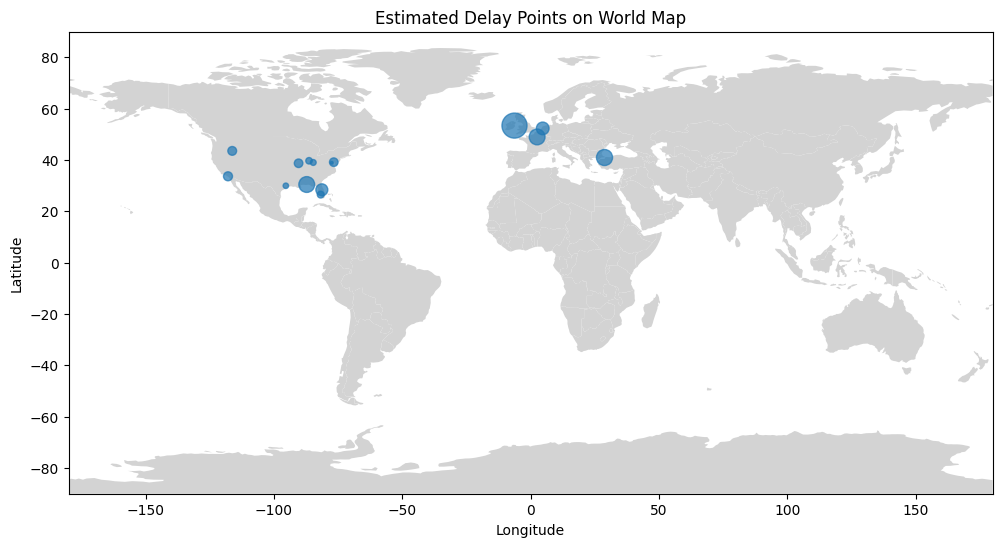

In [50]:
# (in progress) world map with a dot
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have the 'worldmap' and 'result_df' DataFrames

# Merge the world map with the result_df based on latitude and longitude
globe_df = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['longitude'], merged_df['latitude']))

# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6)) 
worldmap.plot(color="lightgrey", ax=ax)

# Plot the points with different colors based on the magnitude of estimatedDelay
globe_df.plot(ax=ax, markersize=merged_df['estimatedDelay']*2, alpha=0.7, legend=True)

# Creating axis limits and title 
plt.xlim([-180, 180]) 
plt.ylim([-90, 90])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Estimated Delay Points on World Map")
plt.show()


In [32]:
import matplotlib.pyplot as plt 
import pandas as pd
import geopandas as gpd


In [ ]:
import pandas as pd

# Load your existing DataFrame with average delays (replace 'average_delay_df.csv' with the actual file path)
average_delay_df = pd.read_csv('average_delay_df.csv')

# Load the airports.csv data into a pandas DataFrame
airports_df = pd.read_csv('airports.csv')

# Extract longitude and latitude from the 'location' column
airports_df[['longitude', 'latitude']] = airports_df['location'].str.extract(r'\(([-\d.]+) ([-\d.]+)\)').astype(float)

# Merge the existing DataFrame with the airports DataFrame based on IATA codes
merged_df = pd.merge(average_delay_df, airports_df[['code', 'longitude', 'latitude']], left_on='icaoCode', right_on='code', how='left')

# Drop the duplicate 'code' column from the merge
merged_df = merged_df.drop(columns='code')

# Print the resulting DataFrame
print(merged_df)


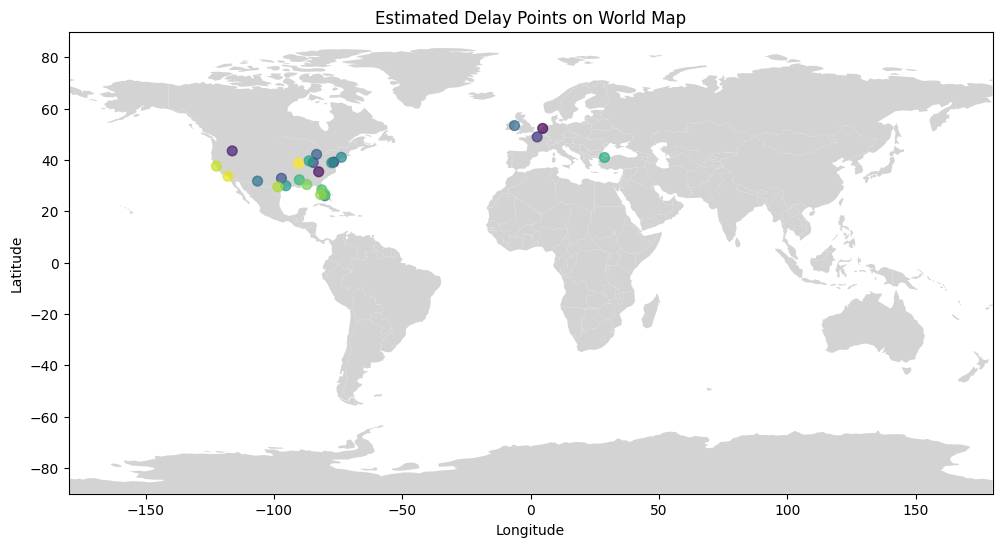

In [56]:
# worked, but no legend
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have the 'worldmap_df' and 'merged_df' DataFrames

# Merge the world map with the merged_df based on latitude and longitude
globe_df = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['longitude'], merged_df['latitude']))

# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6)) 
worldmap.plot(color="lightgrey", ax=ax)

# Plot the points with different colors based on the magnitude of estimatedDelay
globe_df.plot(ax=ax, markersize=50, alpha=0.7, legend=True, c=merged_df['estimatedDelay'], cmap='viridis')

# Creating axis limits and title 
plt.xlim([-180, 180]) 
plt.ylim([-90, 90])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Estimated Delay Points on World Map")
plt.show()


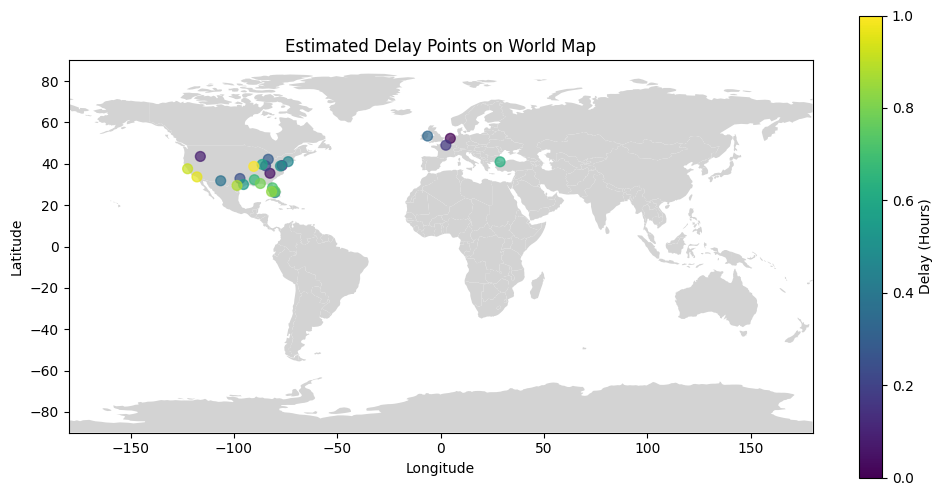

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have the 'worldmap' and 'merged_df' DataFrames

# Merge the world map with the merged_df based on latitude and longitude
globe_df = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['longitude'], merged_df['latitude']))

# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6)) 
worldmap.plot(color="lightgrey", ax=ax)

# Plot the points with different colors based on the magnitude of estimatedDelay
scatter = globe_df.plot(ax=ax, markersize=50, alpha=0.7, legend=True, c=merged_df['estimatedDelay'], cmap='viridis')

# Add a legend
cbar = plt.colorbar(scatter.collections[0], ax=ax, orientation='vertical', label='Delay (Hours)')

# Creating axis limits and title 
plt.xlim([-180, 180]) 
plt.ylim([-90, 90])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Estimated Delay Points on World Map")
plt.show()


# old code on geopanda
# 10. it's important to install everything below
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd

# 11. we can extract information about the coordinate from the list of all countries in the 19th century
df = pd.read_csv('countries_19th_century.csv')
df

# 12. the geopanda functions will make points out of the coordinates supplied by longitude and latitude data
df_geo = gpd.GeoDataFrame(df,geometry = gpd.points_from_xy(df.Longitude,df.Latitude))
df_geo

# 13. this command specifies the kind of map we want. 
world_data= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# 13.1 more customization 
axis = world_data.plot(color = 'lightblue', edgecolor = 'black')
df_geo.plot(ax = axis, color = 'red', markersize= 1)

#13.2 print out the map 
plt.title('World countries')

# repeat step 11- 13 for data frame of wars in the 20th century
df_20th_century

df = pd.read_csv('countries_20th_century.csv')
df
df_geo = gpd.GeoDataFrame(df,geometry = gpd.points_from_xy(df.Longitude,df.Latitude))
df_geo

world_data= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

axis = world_data.plot(color = 'lightblue', edgecolor = 'black')
df_geo.plot(ax = axis, color = 'red', markersize= 1)
plt.title('World countries')# old code on geopanda
# 10. it's important to install everything below
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd

# 11. we can extract information about the coordinate from the list of all countries in the 19th century
df = pd.read_csv('countries_19th_century.csv')
df

# 12. the geopanda functions will make points out of the coordinates supplied by longitude and latitude data
df_geo = gpd.GeoDataFrame(df,geometry = gpd.points_from_xy(df.Longitude,df.Latitude))
df_geo

# 13. this command specifies the kind of map we want. 
world_data= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# 13.1 more customization 
axis = world_data.plot(color = 'lightblue', edgecolor = 'black')
df_geo.plot(ax = axis, color = 'red', markersize= 1)

#13.2 print out the map 
plt.title('World countries')

# repeat step 11- 13 for data frame of wars in the 20th century
df_20th_century

df = pd.read_csv('countries_20th_century.csv')
df
df_geo = gpd.GeoDataFrame(df,geometry = gpd.points_from_xy(df.Longitude,df.Latitude))
df_geo

world_data= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

axis = world_data.plot(color = 'lightblue', edgecolor = 'black')
df_geo.plot(ax = axis, color = 'red', markersize= 1)
plt.title('World countries')